In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")


In [25]:
# Load your dataset
df = pd.read_csv(r"C:\Users\Dell\Downloads\retail_sales_dataset.csv")

# Show the first few rows
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [28]:
print("Dataset shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicate records:", df.duplicated().sum())


Dataset shape: (1000, 9)

Columns:
 Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

Data types:
 Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

Missing values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Duplicate records: 0


In [30]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# If there's a date column like 'Order Date', convert it:
if 'Order Date' in df.columns:
    df['Order Date'] = pd.to_datetime(df['Order Date'])

# Check again
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [36]:
# Replace these with actual names from your dataset:
date_column = 'Order Date'  # update if different
sales_column = 'Sales'      # update if different

# Proceed if the columns exist
if date_column in df.columns and sales_column in df.columns:
    df[date_column] = pd.to_datetime(df[date_column])
    df['Month'] = df[date_column].dt.month
    df['Year'] = df[date_column].dt.year

    monthly_sales = df.groupby(['Year', 'Month'])[sales_column].sum().reset_index()

    plt.figure(figsize=(10, 5))
    sns.lineplot(data=monthly_sales, x='Month', y=sales_column, hue='Year')
    plt.title("Monthly Sales Trend")
    plt.ylabel("Sales Amount")
    plt.show()
else:
    print("Date or Sales column not found. Please check column names.")


Date or Sales column not found. Please check column names.


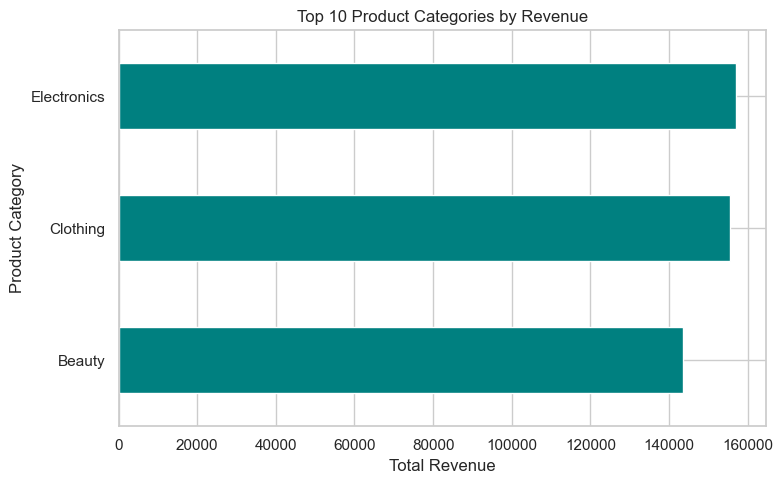

In [44]:
# Top 10 Product Categories by Total Amount
top_products = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
top_products.plot(kind='barh', color='teal')
plt.title("Top 10 Product Categories by Revenue")
plt.xlabel("Total Revenue")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


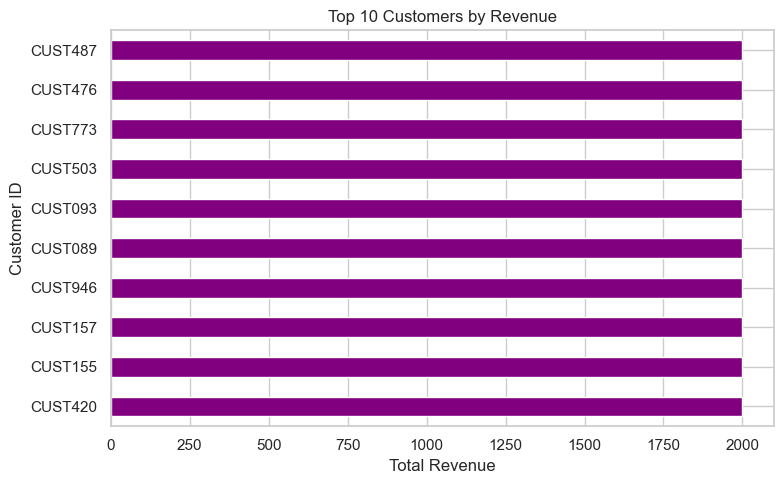

In [48]:
# Top 10 Customers by Total Amount
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
top_customers.plot(kind='barh', color='purple')
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Total Revenue")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
